## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Baca gambar dari file 'buah.jpg'

In [2]:
buah = cv2.imread('buah.jpg')

## Konversi BGR ke RGB

In [3]:
buah_rgb = cv2.cvtColor(buah, cv2.COLOR_BGR2RGB)

## Konversi RGB ke HSV

In [4]:
buah_hsv = cv2.cvtColor(buah_rgb, cv2.COLOR_RGB2HSV)

## Buat mask buah

In [5]:
lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 70, 50])
upper_red2 = np.array([180, 255, 255])

mask_buah1 = cv2.inRange(buah_hsv, lower_red1, upper_red1)
mask_buah2 = cv2.inRange(buah_hsv, lower_red2, upper_red2)
mask_buah = cv2.bitwise_or(mask_buah1, mask_buah2)

## Buat Mask daun

In [6]:
lower_daun = np.array([35, 40, 40])
upper_daun = np.array([85, 255, 255])
mask_daun = cv2.inRange(buah_hsv, lower_daun, upper_daun)

## Segmentasi buah dan daun

In [7]:
segmentasi_buah = cv2.bitwise_and(buah_rgb, buah_rgb, mask=mask_buah)
segmentasi_daun = cv2.bitwise_and(buah_rgb, buah_rgb, mask=mask_daun)

## Menampilkan Hasil

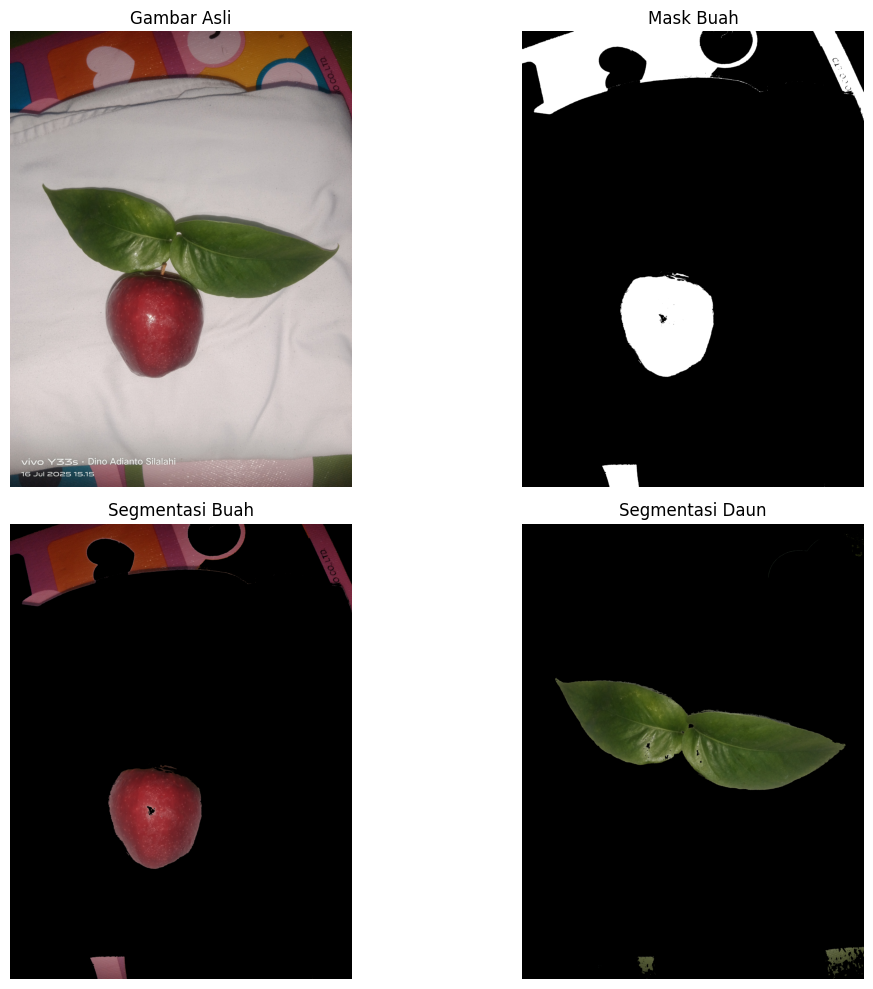

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

axs[0].imshow(buah_rgb)
axs[0].set_title("Gambar Asli")
axs[0].axis('off')

axs[1].imshow(mask_buah, cmap='gray')
axs[1].set_title("Mask Buah")
axs[1].axis('off')

axs[2].imshow(segmentasi_buah)
axs[2].set_title("Segmentasi Buah")
axs[2].axis('off')

axs[3].imshow(segmentasi_daun)
axs[3].set_title("Segmentasi Daun")
axs[3].axis('off')

plt.tight_layout()
plt.show()